In [43]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [45]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [46]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [47]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

**Градиентнй спуск**

In [53]:
# возьмем нулевые начальные веса
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w -  eta * 2 * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    cur_error=mserror(data, new_w, target)
    errors.append(cur_error)   
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')


В случае использования градиентного спуска функционал ошибки составляет 38.5683


Text(0, 0.5, 'MSE')

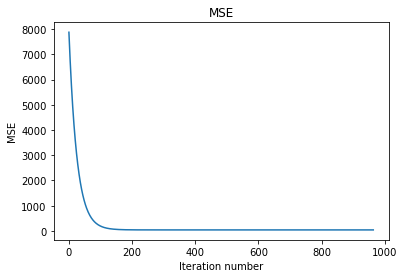

In [33]:
# Визуализируем изменение функционала ошибки для градиентного спуска
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

**Стохастический градиентный спуск**

In [49]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_stoh = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
   
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_stoh.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 38.5683


Text(0, 0.5, 'MSE')

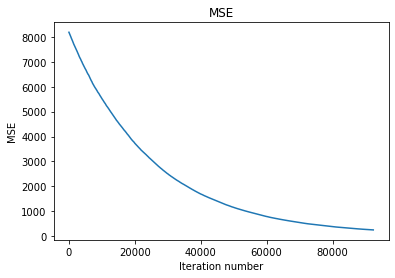

In [50]:
# Визуализируем изменение функционала ошибки для стохастического градиентного спуска
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')




Text(0, 0.5, 'MSE')

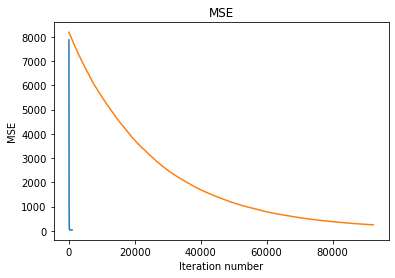

In [51]:
# Визуализируем изменение функционала ошибки для градиентного спуска и стахостического градиентного спуска на одном графике
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_stoh)), errors_stoh)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')


Вывод: Скорость падения MSE при применении стохаcтического градиентного спуска ниже, чем при градиентном спуске.